In [1]:
import pandas as pd

import numpy as np

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
results_df = pd.read_pickle("../inference_results.pk")
results_df.head()

,y,y_hat,predicted_prompt,probability
0,0,"[0.69189453, 0.042877197, 0.0078086853, 0.0567...",This is a picture of a(n) boat.,0.691895
1,0,"[0.9975586, 0.00011384487, 0.0003733635, 0.000...",This is a picture of a(n) boat.,0.997559
2,0,"[0.92089844, 0.0014286041, 0.00078868866, 0.01...",This is a picture of a(n) boat.,0.920898
3,0,"[0.94091797, 0.0027256012, 0.0016536713, 0.005...",This is a picture of a(n) boat.,0.940918
4,0,"[0.9975586, 0.00048685074, 0.00015079975, 0.00...",This is a picture of a(n) boat.,0.997559


In [3]:
n_classes = 8

y, y_hat = results_df["y"].values, results_df["y_hat"].values

y_hat = np.array(list(y_hat), dtype=np.float64)

for i, _ in enumerate(y_hat):
    norm = 1 / np.sum(y_hat[i])
    y_hat[i] = y_hat[i] * norm

auc_score = roc_auc_score(y, y_hat, multi_class='ovo')
print(f"Model AUC score is '{auc_score}'")

Model AUC score is '0.991769993480822'


In [4]:
class_pred = [np.argmax(y_hat[i]) for i, _ in enumerate(y_hat)]
classes = ['boat', 'airplane', 'motorcycle', 'bus', 'truck', 'bicycle', 'car', 'train']
print(classification_report(y, class_pred, target_names=classes))

              precision    recall  f1-score   support

        boat       1.00      0.94      0.97        79
    airplane       0.98      0.98      0.98        60
  motorcycle       0.96      0.98      0.97        54
         bus       0.79      0.94      0.86        69
       truck       0.83      0.73      0.78        81
     bicycle       0.96      0.98      0.97        46
         car       0.71      0.64      0.67        47
       train       0.90      0.97      0.94        67

    accuracy                           0.89       503
   macro avg       0.89      0.89      0.89       503
weighted avg       0.89      0.89      0.89       503



In [5]:
confusion_matrix = confusion_matrix(y, class_pred)

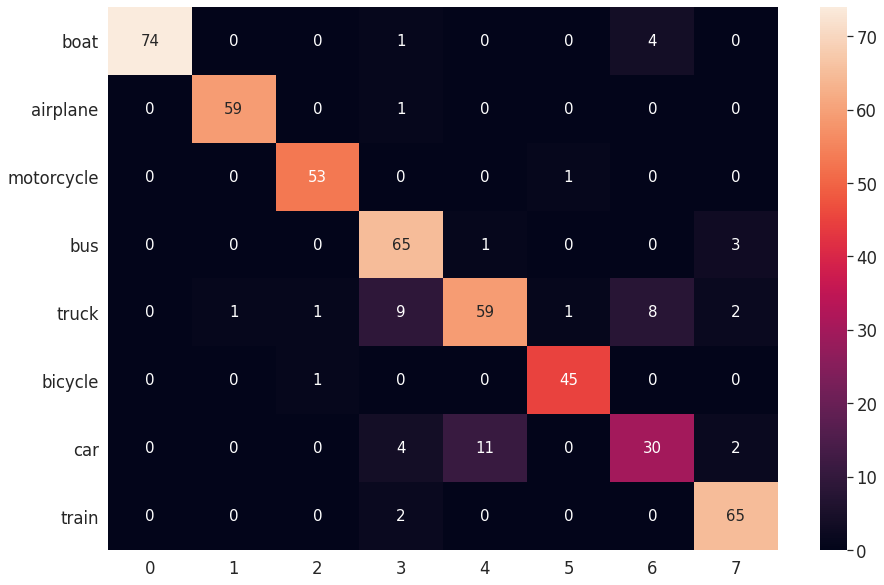

In [6]:
confusion_matrix_df = pd.DataFrame(confusion_matrix, classes, range(n_classes))
plt.figure(figsize=(15, 10))
sn.set(font_scale=1.5)
sn.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 15})

plt.show()